In [8]:
from google.colab import files
uploaded = files.upload()

Saving Resume_dataSet.csv to Resume_dataSet.csv


In [ ]:
!pip install nltk tensorflow panda

  Preparing metadata (setup.py) ... done
  Created wheel for panda: filename=panda-0.3.1-py3-none-any.whl size=7239 sha256=f0ad67c80f59593b0c1459f90052a40b06f2cedcdedbd69006eb9c2c19df464d
  Stored in directory: /root/.cache/pip/wheels/0e/8b/c3/ff9cbde1fffd8071cff8367a86f0350a1ce30a8d31b6a432e9
Successfully built panda


In [ ]:
import pandas as pd
import numpy as np
import tensorflow.keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import nltk
nltk.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

True

In [ ]:
import pandas as pd
data = pd.read_csv('Resume_dataSet.csv')
data

,Degree,Experience,Technology,Organization,Eligible,Not Eligible
0,Bachelor of Computer Science in Artificial Int...,5,"Python,R,Deep Learning,Machine Learning","Microsoft,Google",1,0
1,Bachelor of Computer Science in Artificial Int...,1,"Python,R,Deep Learning,Machine Learning","Microsoft,Google",1,0
2,Bachelor of Computer Science in Data Science a...,1,"Python,R,Data Analysis,Probability Theory","Google,IBM",1,0
3,Bachelor of Computer Science in Data Science a...,1,"Python,R,Data Analysis,Probability Theory","Google,IBM",1,0
4,Bachelor of Computer Science in Data Science a...,1,"Python,R,Data Analysis,Probability Theory","Google,IBM",1,0
...,...,...,...,...,...,...
593,Master's in Statistics,3,"SAS, SAS Viya",SAS Institute,1,0
594,Master's in Statistics,3,"SAS, SQL",Google Inc.,1,0
595,Master's in Statistics,3,"SAS, SAS Viya",Oracle Corporation,1,0
596,PhD in Robotics,6,"C++,ROS,Gazebo,Computer Vision","Stanford University,Bosch",1,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Degree        598 non-null    object
 1   Experience    598 non-null    int64 
 2   Technology    598 non-null    object
 3   Organization  598 non-null    object
 4   Eligible      598 non-null    int64 
 5   Not Eligible  598 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [ ]:
data.duplicated().sum()

157

In [ ]:
df = pd.read_csv("Resume_dataSet.csv", encoding='cp1252')
df


,Degree,Experience,Technology,Organization,Eligible,Not Eligible
0,Bachelor of Computer Science in Artificial Int...,5,"Python,R,Deep Learning,Machine Learning","Microsoft,Google",1,0
1,Bachelor of Computer Science in Artificial Int...,1,"Python,R,Deep Learning,Machine Learning","Microsoft,Google",1,0
2,Bachelor of Computer Science in Data Science a...,1,"Python,R,Data Analysis,Probability Theory","Google,IBM",1,0
3,Bachelor of Computer Science in Data Science a...,1,"Python,R,Data Analysis,Probability Theory","Google,IBM",1,0
4,Bachelor of Computer Science in Data Science a...,1,"Python,R,Data Analysis,Probability Theory","Google,IBM",1,0
...,...,...,...,...,...,...
593,Master's in Statistics,3,"SAS, SAS Viya",SAS Institute,1,0
594,Master's in Statistics,3,"SAS, SQL",Google Inc.,1,0
595,Master's in Statistics,3,"SAS, SAS Viya",Oracle Corporation,1,0
596,PhD in Robotics,6,"C++,ROS,Gazebo,Computer Vision","Stanford University,Bosch",1,0


In [ ]:
print(df.shape)

df.head()

(598, 6)


,Degree,Experience,Technology,Organization,Eligible,Not Eligible
0,Bachelor of Computer Science in Artificial Int...,5,"Python,R,Deep Learning,Machine Learning","Microsoft,Google",1,0
1,Bachelor of Computer Science in Artificial Int...,1,"Python,R,Deep Learning,Machine Learning","Microsoft,Google",1,0
2,Bachelor of Computer Science in Data Science a...,1,"Python,R,Data Analysis,Probability Theory","Google,IBM",1,0
3,Bachelor of Computer Science in Data Science a...,1,"Python,R,Data Analysis,Probability Theory","Google,IBM",1,0
4,Bachelor of Computer Science in Data Science a...,1,"Python,R,Data Analysis,Probability Theory","Google,IBM",1,0


In [ ]:
print('Total Technology this period:', len(data.index), '\n')

Total Technology this period: 598 



In [ ]:
df.iloc[100]

print(df.info())  # summary of data types and counts

print(df.describe())  # summary statistics for numerical columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Degree        598 non-null    object
 1   Experience    598 non-null    int64 
 2   Technology    598 non-null    object
 3   Organization  598 non-null    object
 4   Eligible      598 non-null    int64 
 5   Not Eligible  598 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 28.2+ KB
None
       Experience    Eligible  Not Eligible
count  598.000000  598.000000    598.000000
mean     2.249164    0.740803      0.259197
std      1.935248    0.438561      0.438561
min      0.000000    0.000000      0.000000
25%      0.000000    0.000000      0.000000
50%      2.000000    1.000000      0.000000
75%      3.000000    1.000000      1.000000
max      7.000000    1.000000      1.000000


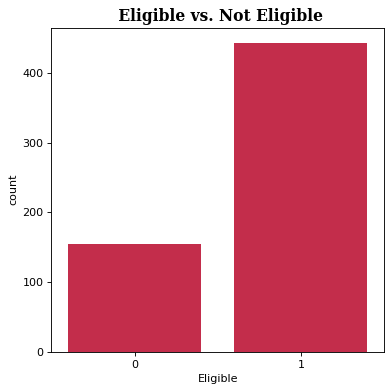

In [ ]:
# Import necessary libraries
import pandas as pd
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.font_manager import FontProperties
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 80

# Read the CSV file into a DataFrame
df = pd.read_csv("Resume_dataSet.csv", encoding='cp1252')

# ... (rest of your plotting code) ...

font = FontProperties()
font.set_family('serif')
# ... (rest of your font settings) ...

plt.figure(figsize=(5, 5))

plt.title(' Eligible vs. Not Eligible',fontproperties=font,fontweight ="bold",fontsize=14)
# ... (rest of your plotting code) ...

sns.countplot(x='Eligible', data=df,color = 'crimson')  # visualize eligible vs. not eligible
plt.tight_layout()
plt.show()

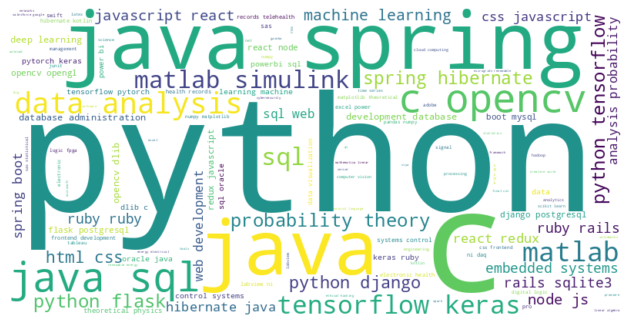

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [t for t in tokens if t not in stop_words]
    return ' '.join(tokens)

df['Technology'] = df['Technology'].apply(preprocess_text)

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Combine all preprocessed text into a single string
text = ' '.join(df['Technology'])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400,
                      background_color='white',
                      stopwords=STOPWORDS).generate(text)

# Display the generated image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


(598, 50)


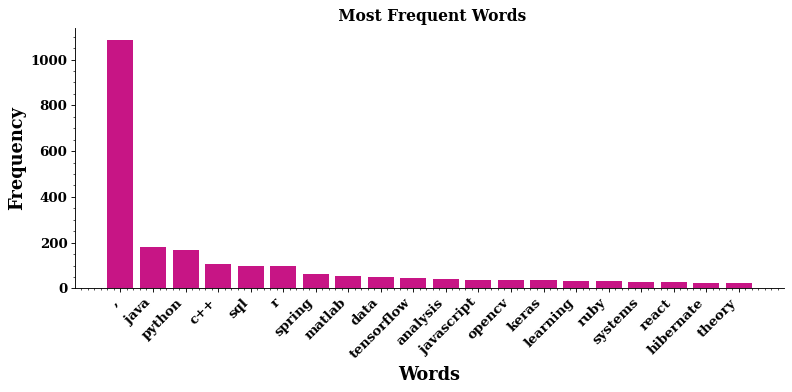

In [ ]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(df['Technology'])

sequences = tokenizer.texts_to_sequences(df['Technology'])
padded_sequences = pad_sequences(sequences, maxlen=50)

print(padded_sequences.shape)

# @title WORD FREQUENCY
from collections import Counter
import matplotlib.pyplot as plt

# Combine all preprocessed text into a single string
text = ' '.join(df['Technology'])

# Count word frequencies
word_counts = Counter(text.split())

# Get the 20 most common words and their counts
top_words = word_counts.most_common(20)

# Extract words and counts for plotting
words, counts = zip(*top_words)

# Create a bar chart


plt.figure(figsize=(10, 5))
plt.bar(words, counts,color = 'mediumvioletred')
plt.title(' Most Frequent Words',fontproperties=font,fontweight ="bold",fontsize=14)
plt.ylabel('Frequency',fontproperties=font,fontweight ="bold",fontsize=16)
plt.xlabel('Words',fontproperties=font,fontweight ="bold",fontsize=16)
sns.despine()
plt.minorticks_on()
plt.xticks(fontproperties=font,fontweight ="bold",fontsize=12)
plt.yticks(fontproperties=font,fontweight ="bold",fontsize=12)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



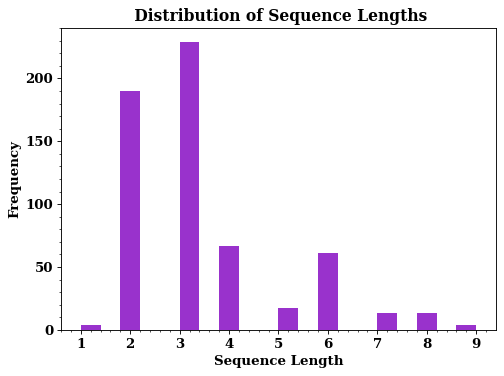

Sequence 1: [2, 5, 39, 14, 27, 14]
Sequence 2: [2, 5, 39, 14, 27, 14]
Sequence 3: [2, 5, 8, 10, 21, 19]
Sequence 4: [2, 5, 8, 10, 21, 19]
Sequence 5: [2, 5, 8, 10, 21, 19]


In [ ]:
# @title Sequence Length Distribution
import matplotlib.pyplot as plt

# Calculate sequence lengths
sequence_lengths = [len(seq) for seq in sequences]

# Create a histogram
plt.hist(sequence_lengths, bins=20,color = 'darkorchid')
plt.title(' Distribution of Sequence Lengths',fontproperties=font,fontweight ="bold",fontsize=14)
plt.ylabel('Frequency',fontproperties=font,fontweight ="bold",fontsize=12)
plt.xlabel('Sequence Length',fontproperties=font,fontweight ="bold",fontsize=12)
plt.minorticks_on()
plt.xticks(fontproperties=font,fontweight ="bold",fontsize=12)
plt.yticks(fontproperties=font,fontweight ="bold",fontsize=12)


plt.tight_layout()

plt.show()

# @title Toxenized Sequence (Text converted into numerical)
# Print the first 5 tokenized sequences
for i in range(5):
    print(f"Sequence {i+1}: {sequences[i]}")

In [ ]:
data['Technology'][0]

'Python,R,Deep Learning,Machine Learning'

In [ ]:
'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigations and Dispute Services   Assurance\r\nTECHNOLOGY ASSISTED REVIEW\r\nTAR (Technology Assisted Review) assists in accelerating the review process and run analytics and generate reports.\r\n* Core member of a team helped in developing automated review platform tool from scratch for assisting E discovery domain, this tool implements predictive coding and topic modelling by automating reviews, resulting in reduced labor costs and time spent during the lawyers review.\r\n* Understand the end to end flow of the solution, doing research and development for classification models, predictive analysis and mining of the information present in text data. Worked on analyzing the outputs and precision monitoring for the entire tool.\r\n* TAR assists in predictive coding, topic modelling from the evidence by following EY standards. Developed the classifier models in order to identify "red flags" and fraud-related issues.\r\n\r\nTools & Technologies: Python, scikit-learn, tfidf, word2vec, doc2vec, cosine similarity, NaÃ¯ve Bayes, LDA, NMF for topic modelling, Vader and text blob for sentiment analysis. Matplot lib, Tableau dashboard for reporting.\r\n\r\nMULTIPLE DATA SCIENCE AND ANALYTIC PROJECTS (USA CLIENTS)\r\nTEXT ANALYTICS - MOTOR VEHICLE CUSTOMER REVIEW DATA * Received customer feedback survey data for past one year. Performed sentiment (Positive, Negative & Neutral) and time series analysis on customer comments across all 4 categories.\r\n* Created heat map of terms by survey category based on frequency of words * Extracted Positive and Negative words across all the Survey categories and plotted Word cloud.\r\n* Created customized tableau dashboards for effective reporting and visualizations.\r\nCHATBOT * Developed a user friendly chatbot for one of our Products which handle simple questions about hours of operation, reservation options and so on.\r\n* This chat bot serves entire product related questions. Giving overview of tool via QA platform and also give recommendation responses so that user question to build chain of relevant answer.\r\n* This too has intelligence to build the pipeline of questions as per user requirement and asks the relevant /recommended questions.\r\n\r\nTools & Technologies: Python, Natural language processing, NLTK, spacy, topic modelling, Sentiment analysis, Word Embedding, scikit-learn, JavaScript/JQuery, SqlServer\r\n\r\nINFORMATION GOVERNANCE\r\nOrganizations to make informed decisions about all of the information they store. The integrated Information Governance portfolio synthesizes intelligence across unstructured data sources and facilitates action to ensure organizations are best positioned to counter information risk.\r\n* Scan data from multiple sources of formats and parse different file formats, extract Meta data information, push results for indexing elastic search and created customized, interactive dashboards using kibana.\r\n* Preforming ROT Analysis on the data which give information of data which helps identify content that is either Redundant, Outdated, or Trivial.\r\n* Preforming full-text search analysis on elastic search with predefined methods which can tag as (PII) personally identifiable information (social security numbers, addresses, names, etc.) which frequently targeted during cyber-attacks.\r\nTools & Technologies: Python, Flask, Elastic Search, Kibana\r\n\r\nFRAUD ANALYTIC PLATFORM\r\nFraud Analytics and investigative platform to review all red flag cases.\r\nâ\x80¢ FAP is a Fraud Analytics and investigative platform with inbuilt case manager and suite of Analytics for various ERP systems.\r\n* It can be used by clients to interrogate their Accounting systems for identifying the anomalies which can be indicators of fraud by running advanced analytics\r\nTools & Technologies: HTML, JavaScript, SqlServer, JQuery, CSS, Bootstrap, Node.js, D3.js, DC.js'

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

In [ ]:
data['Technology'].value_counts()

Technology
Java, Spring                                                        22
R, Python                                                           21
MATLAB, Simulink                                                    18
Java, Spring, Hibernate                                             18
Java, C++, SQL                                                      18
                                                                    ..
Java, Python, SQL                                                    1
c++                                                                  1
C++,c,Python                                                         1
Java,SQL,Web Development,Database Administration,Cloud Computing     1
C++,Matlab,Power Electronics,Embedded Systems                        1
Name: count, Length: 164, dtype: int64

<Axes: xlabel='count', ylabel='Technology'>

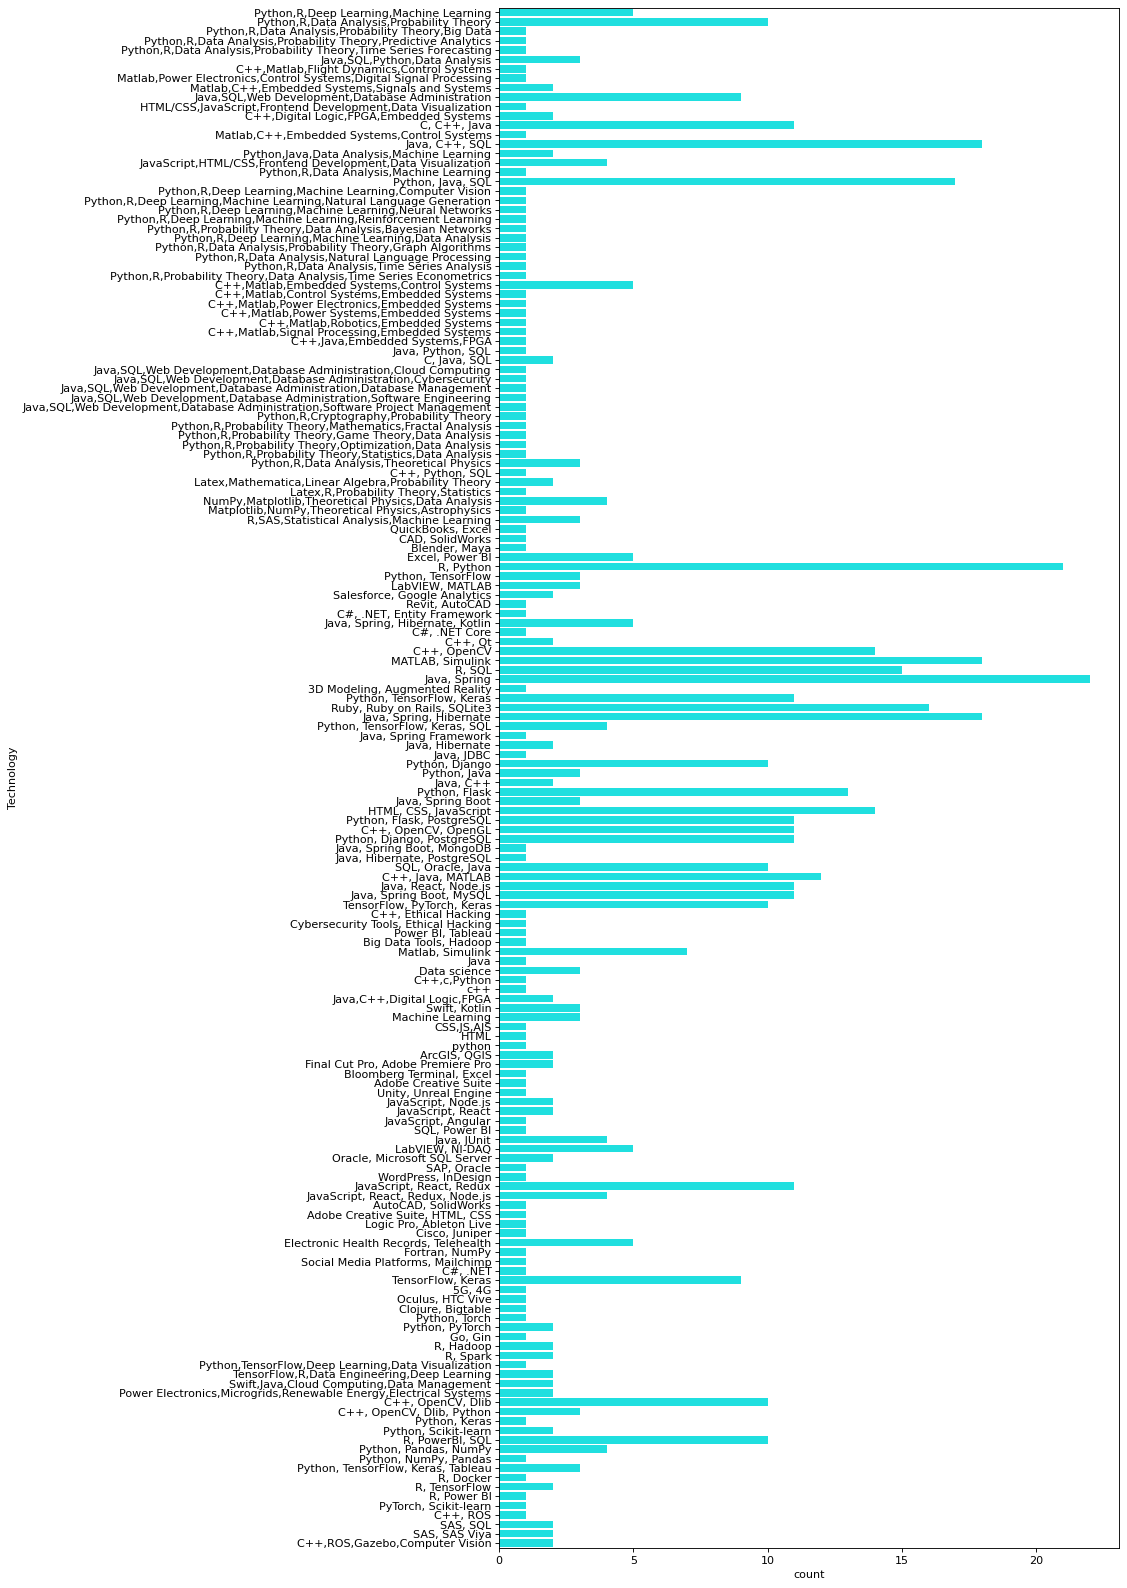

In [ ]:
plt.figure(figsize=(10, 25))
sns.countplot(y='Technology', data=data,color ='aqua')

In [ ]:
#pre-processing of data to remove special characters, hashtags, urls etc
import re
def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText)
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    return resumeText

data['cleaned_resume'] = data.Technology.apply(lambda x: cleanResume(x))
data

,Degree,Experience,Technology,Organization,Eligible,Not Eligible,cleaned_resume
0,Bachelor of Computer Science in Artificial Int...,5,"Python,R,Deep Learning,Machine Learning","Microsoft,Google",1,0,Python R Deep Learning Machine Learning
1,Bachelor of Computer Science in Artificial Int...,1,"Python,R,Deep Learning,Machine Learning","Microsoft,Google",1,0,Python R Deep Learning Machine Learning
2,Bachelor of Computer Science in Data Science a...,1,"Python,R,Data Analysis,Probability Theory","Google,IBM",1,0,Python R Data Analysis Probability Theory
3,Bachelor of Computer Science in Data Science a...,1,"Python,R,Data Analysis,Probability Theory","Google,IBM",1,0,Python R Data Analysis Probability Theory
4,Bachelor of Computer Science in Data Science a...,1,"Python,R,Data Analysis,Probability Theory","Google,IBM",1,0,Python R Data Analysis Probability Theory
...,...,...,...,...,...,...,...
593,Master's in Statistics,3,"SAS, SAS Viya",SAS Institute,1,0,SAS SAS Viya
594,Master's in Statistics,3,"SAS, SQL",Google Inc.,1,0,SAS SQL
595,Master's in Statistics,3,"SAS, SAS Viya",Oracle Corporation,1,0,SAS SAS Viya
596,PhD in Robotics,6,"C++,ROS,Gazebo,Computer Vision","Stanford University,Bosch",1,0,C ROS Gazebo Computer Vision


(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 [Text(0, -0.2, '−0.2'),
  Text(0, 0.0, '0.0'),
  Text(0, 0.2, '0.2'),
  Text(0, 0.4000000000000001, '0.4'),
  Text(0, 0.6000000000000001, '0.6'),
  Text(0, 0.8, '0.8'),
  Text(0, 1.0000000000000002, '1.0'),
  Text(0, 1.2000000000000002, '1.2')])

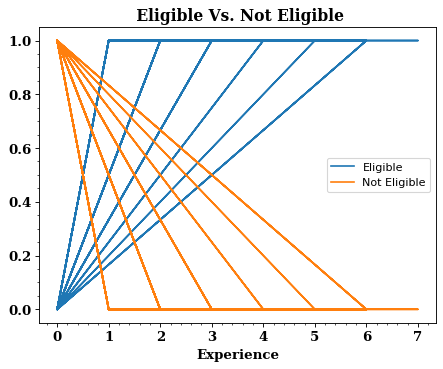

In [ ]:
data.plot(x='Experience', y=['Eligible', 'Not Eligible'])
plt.title(' Eligible Vs. Not Eligible',fontproperties=font,fontweight ="bold",fontsize=14)
#plt.ylabel('Frequency',fontproperties=font,fontweight ="bold",fontsize=12)
plt.xlabel('Experience',fontproperties=font,fontweight ="bold",fontsize=12)
plt.minorticks_on()
plt.xticks(fontproperties=font,fontweight ="bold",fontsize=12)
plt.yticks(fontproperties=font,fontweight ="bold",fontsize=12)

In [ ]:
print('--- Original CV ---')
print(data['Technology'][0])

--- Original CV ---
Python,R,Deep Learning,Machine Learning


In [ ]:
# Printing the same resume after text cleaning
print('--- Cleaned resume ---')
print(data['cleaned_resume'][0])

--- Cleaned resume ---
Python R Deep Learning Machine Learning


In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud

oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
totalWords =[]
Sentences = data['cleaned_resume'].values
cleanedSentences = ""
for i in range(len(data)):
    cleanedText = cleanResume(Sentences[i])
    cleanedSentences += cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)

wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)

[('Java', 181), ('Python', 167), ('C', 124), ('SQL', 100), ('R', 97), ('Spring', 61), ('Data', 50), ('TensorFlow', 45), ('Analysis', 40), ('JavaScript', 39), ('OpenCV', 38), ('Keras', 38), ('Learning', 33), ('MATLAB', 33), ('Ruby', 32), ('Systems', 30), ('React', 28), ('Hibernate', 26), ('Theory', 25), ('Simulink', 25), ('Probability', 24), ('Flask', 24), ('PostgreSQL', 23), ('Matlab', 22), ('HTML', 21), ('CSS', 21), ('Django', 21), ('Machine', 19), ('Development', 19), ('Node', 17), ('js', 17), ('Embedded', 16), ('Rails', 16), ('SQLite3', 16), ('Database', 15), ('Boot', 15), ('Redux', 15), ('Web', 14), ('Administration', 14), ('Deep', 13), ('Power', 13), ('Oracle', 13), ('PyTorch', 13), ('Dlib', 13), ('NumPy', 11), ('OpenGL', 11), ('MySQL', 11), ('PowerBI', 10), ('Control', 9), ('SAS', 9)]


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


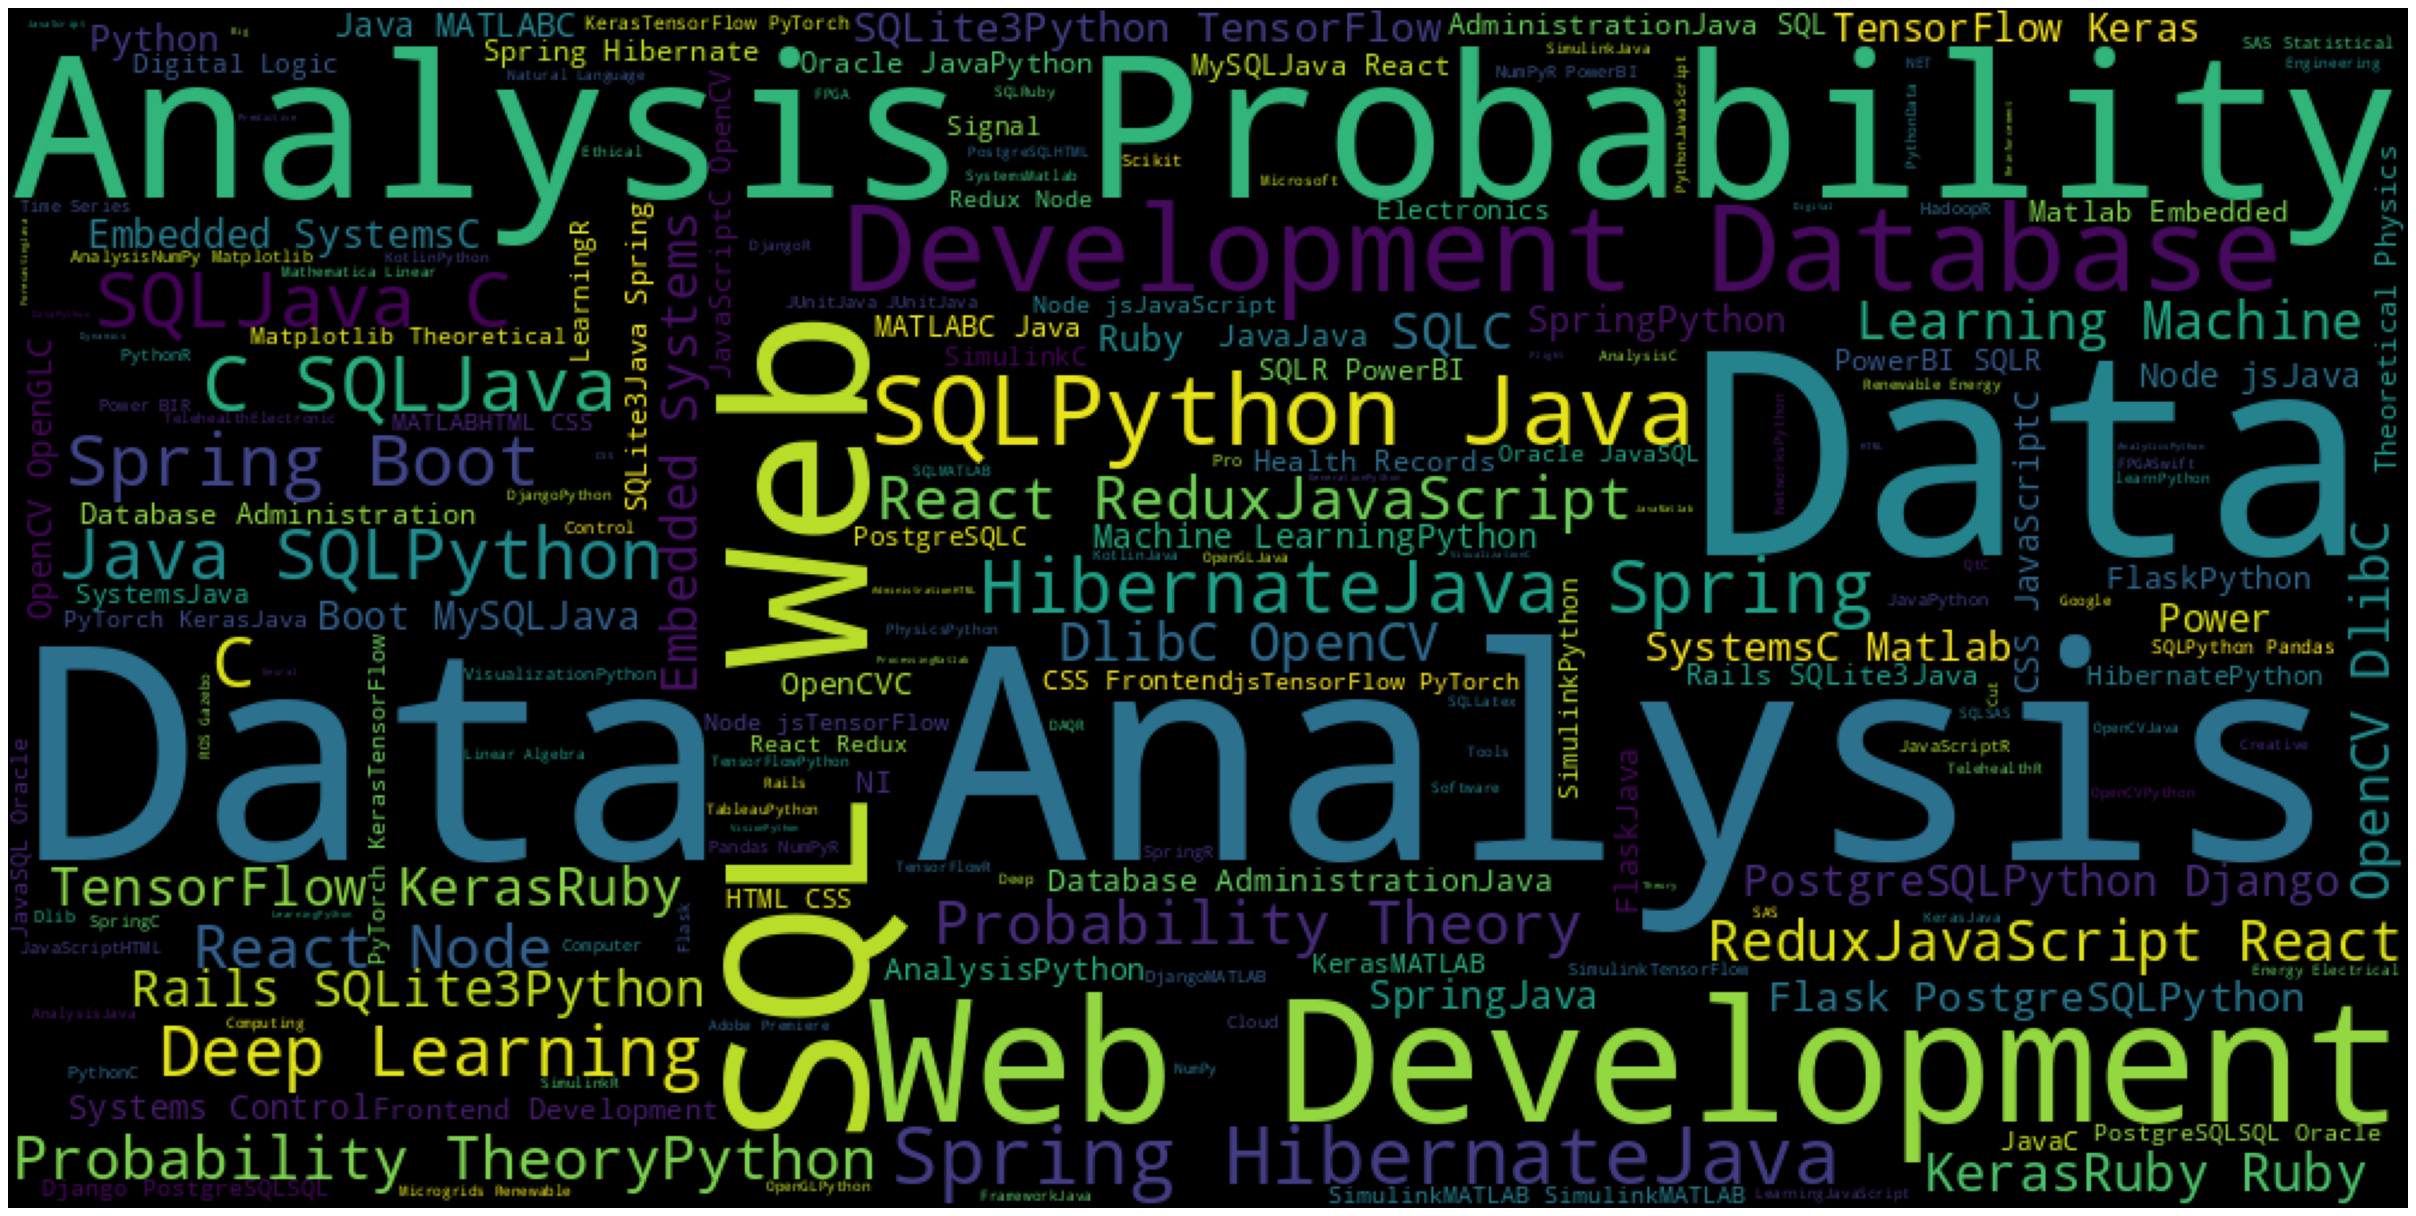

In [ ]:
wordcloud = WordCloud( background_color='black',
                          width=1000,
                          height=500,
                    ).generate(cleanedSentences)

fig = plt.figure(figsize=(30,20))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
fig.savefig("tag.png")
plt.show()